# Dataset Info.

### train.csv [파일]
- ID : 대구에서 발생한 교통사고의 고유 ID -2019년부터 2021년까지의 교통사고 데이터로 구성
- 해당 사고가 발생한 당시의 시공간 정보와 사고 관련 정보 포함
- ECLO : 인명피해 심각도
  - ※ ECLO(Equivalent Casualty Loss Only) : 인명피해 심각도
    ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1

  
### test.csv [파일]
- ID : 대구에서 발생한 교통사고의 고유 ID
- 2022년도의 교통사고 데이터로 구성
- 추론 시점에서 획득할 수 있는 정보로 구성

### sample_submission.csv [파일] - 제출 양식
- ID : 추론 샘플의 고유 ID
- ECLO : 예측한 인명피해 심각도

### 대구 빅데이터 마트 데이터 [폴더]
- 대구 빅데이터활용센터에서 구축한 빅데이터 마트 데이터 중 제공 가능한 일부 데이터셋
- 상세한 명세는 폴더 내부의 빅데이터 마트 데이터 설명서.hwp 참고
- 전체 빅데이터 마트 데이터셋을 활용하기 위해서는 대구 빅데이터활용센터 방문 필요

### countrywide_accident.csv [파일]
- 대구를 제외한 전국에서 발생한 교통사고 데이터
- 2019년부터 2021년까지의 교통사고 데이터로 구성
- train.csv와 양식 동일

### 대구 보안등 정보.csv [파일]
- 대구에 존재하는 보안등 관련 정보

### 대구 어린이 보호 구역 정보.csv [파일]
- 대구에 존재하는 어린이 보호 구역 관련 정보

### 대구 주차장 정보.csv [파일]
- 대구에 존재하는 주차장 관련 정보

### 대구 CCTV 정보.csv [파일]
- 대구에 존재하는 CCTV 관련 정보

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['font.family'] ='Malgun Gothic'

### train.csv

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [3]:
train_df.describe()

,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


In [6]:
# na 값 확인
train_df.isna().sum(axis = 0)

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

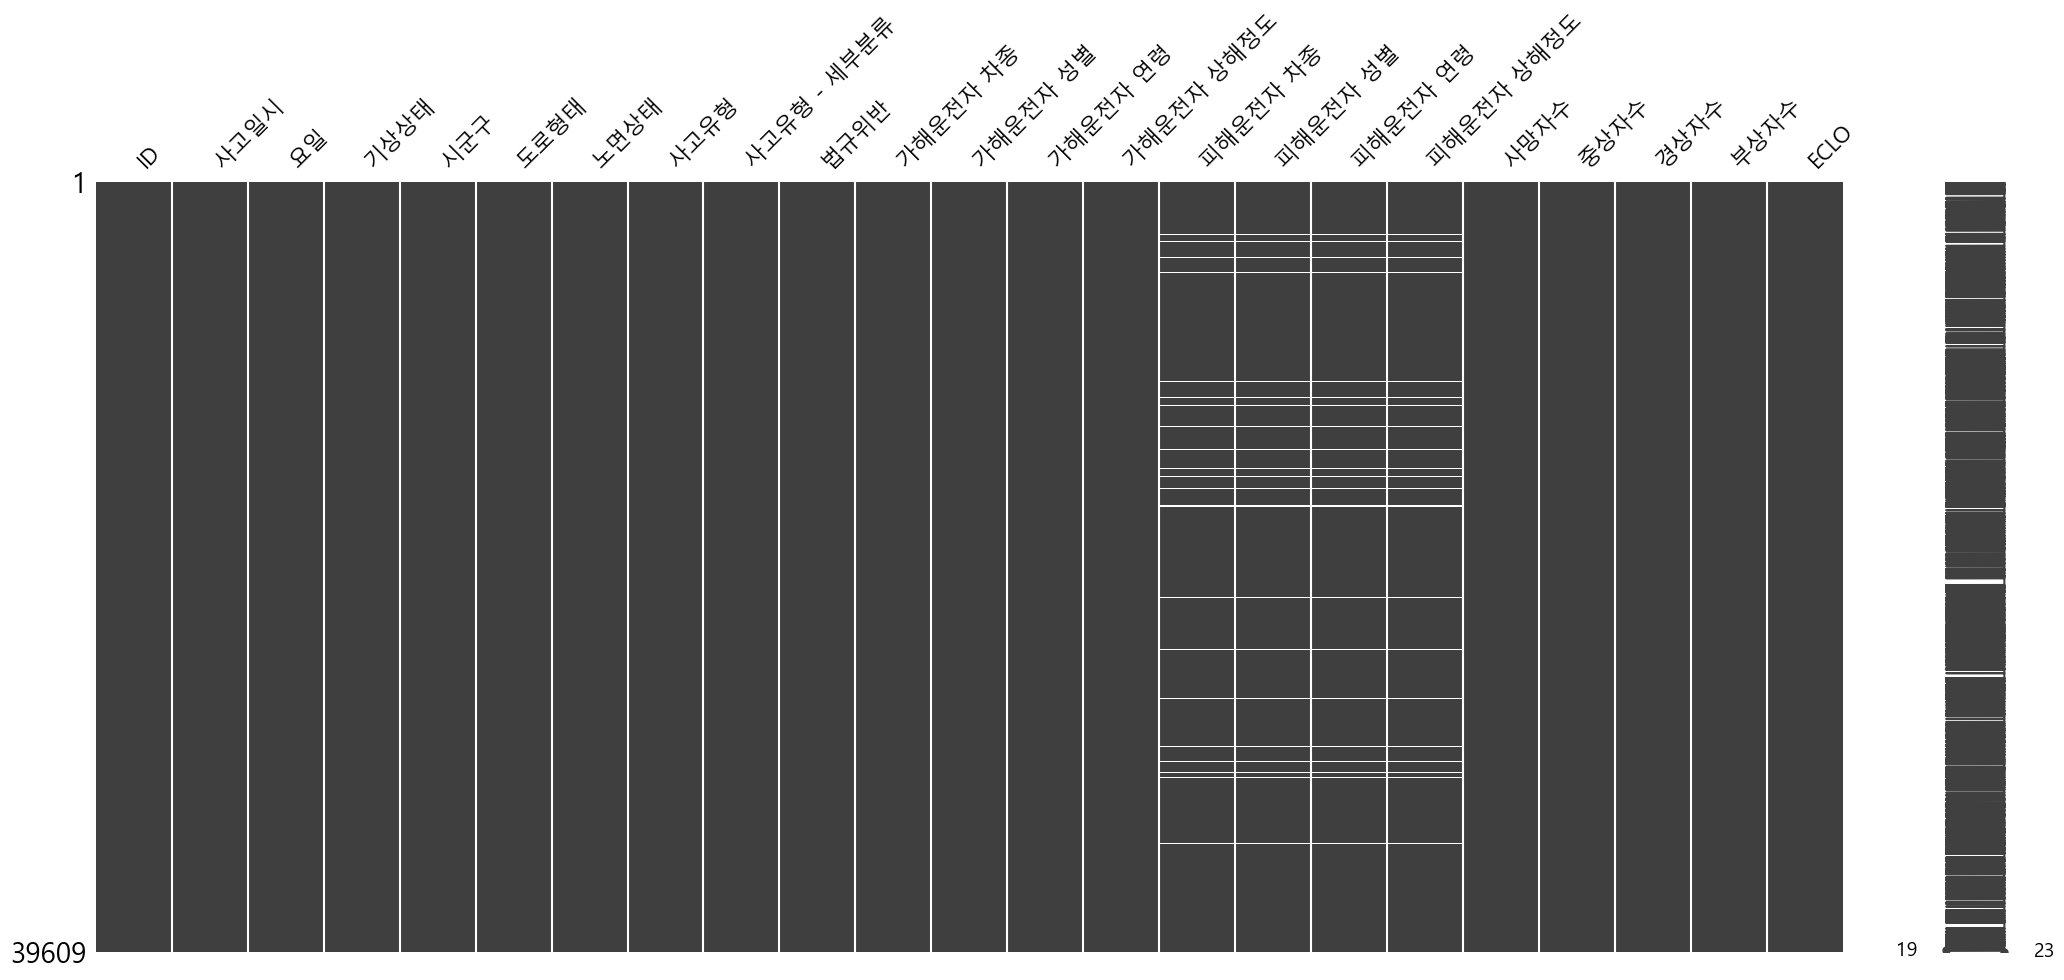

In [16]:
msno.matrix(train_df)
plt.show()

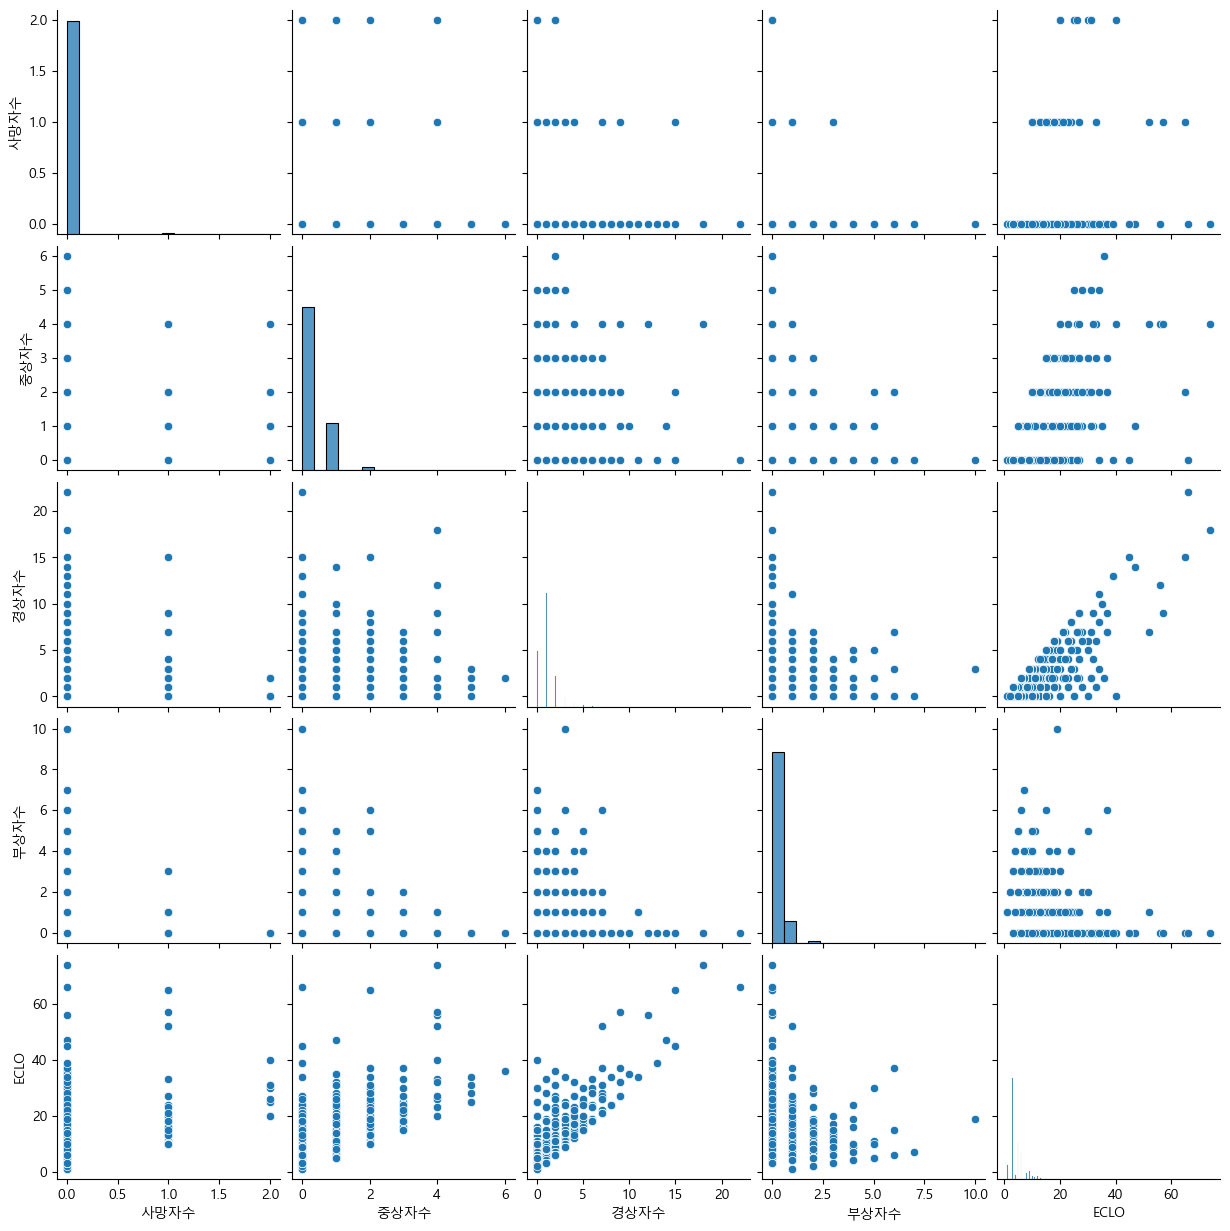

In [42]:
sns.pairplot(data=train_df[['사망자수','중상자수','경상자수', '부상자수','ECLO']])

In [19]:
train_df['시간대'] = train_df['사고일시'].apply(lambda x : x.split(' ')[1])

In [22]:
train_df['ECLO'].unique()

array([ 5,  3,  6, 18,  9,  8, 15,  2,  1,  7,  4, 12, 13, 10, 11, 16, 40,
       22, 21, 17, 25, 14, 20, 27, 19, 24, 26, 23, 28, 31, 30, 47, 36, 33,
       34, 35, 37, 65, 56, 32, 57, 45, 52, 74, 39, 66], dtype=int64)

<Axes: xlabel='ECLO', ylabel='Density'>

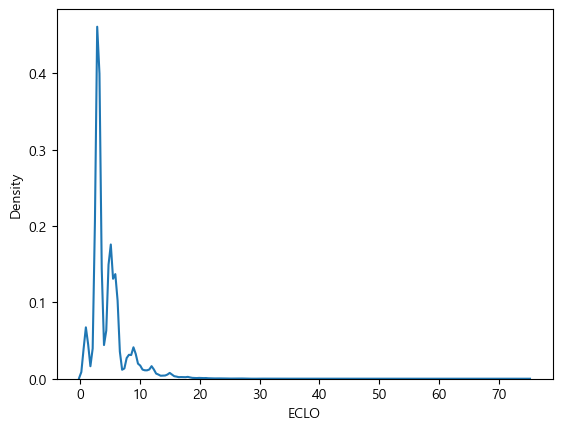

In [43]:
sns.kdeplot(data = train_df, x='ECLO')

-> median 사용해서 경향성 보기

In [79]:
train_df['새벽'] = np.where(train_df['시간대'] <= '06','새벽','그 외')

In [44]:
train_df.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO', '시간대', '새벽'],
      dtype='object')

,요일,cnt
0,금요일,6179
1,목요일,5759
2,수요일,5969
3,월요일,5895
4,일요일,4114
5,토요일,5670
6,화요일,6023


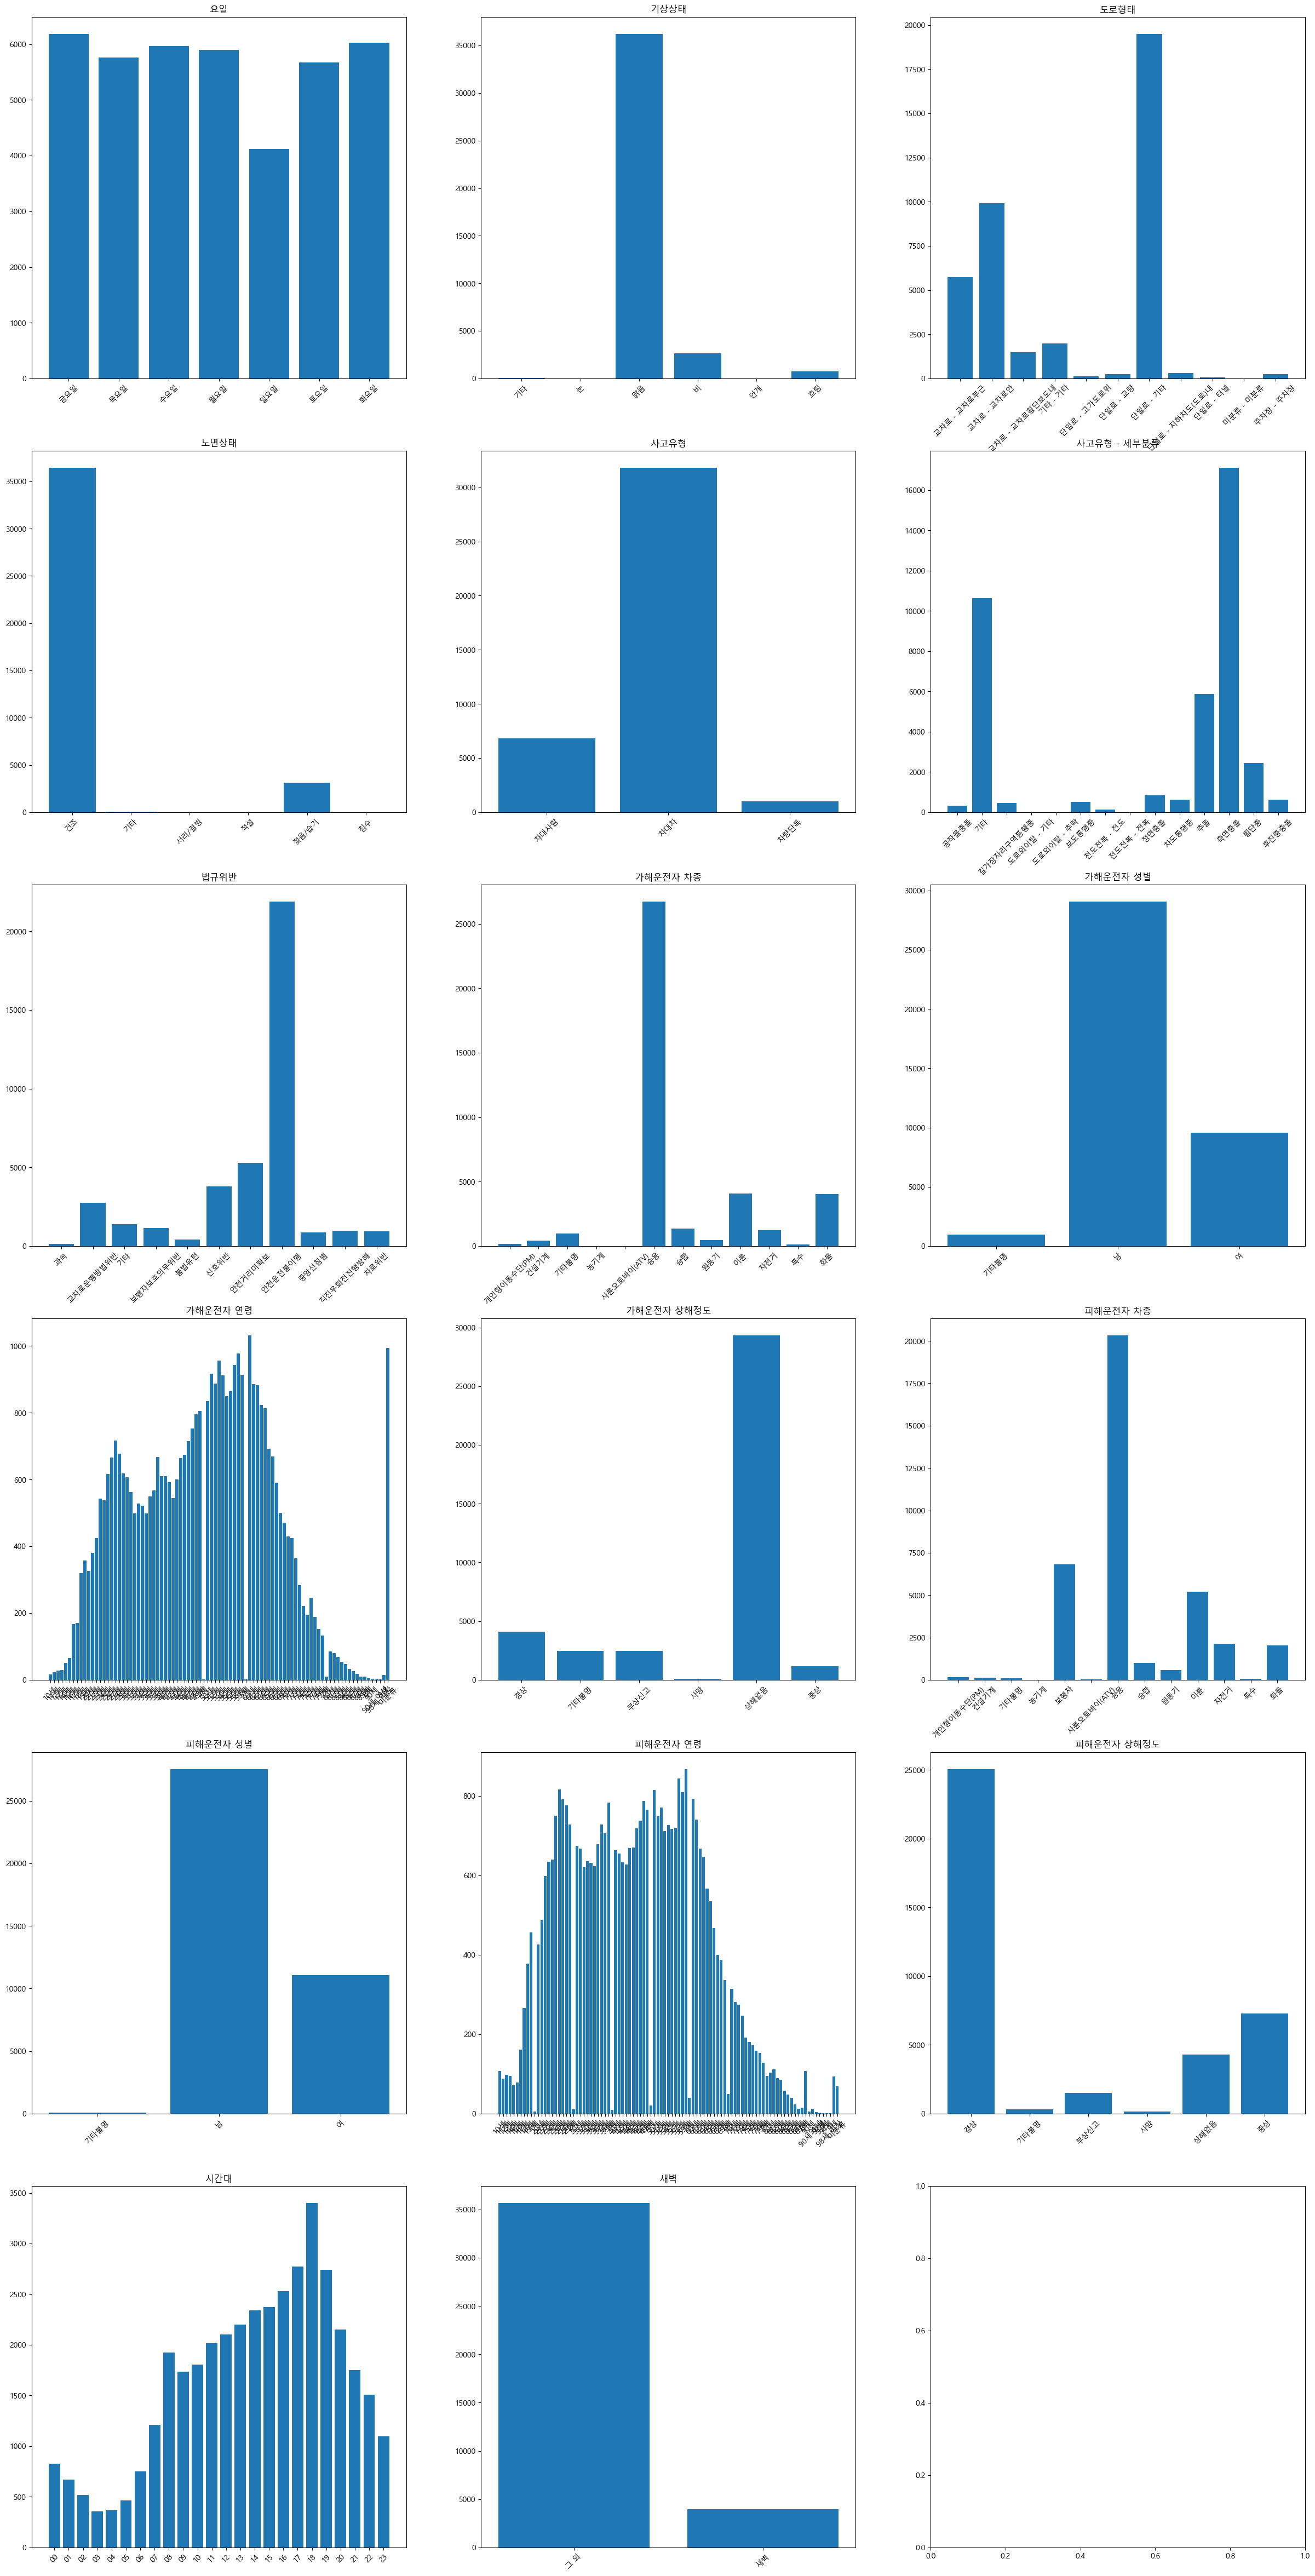

In [151]:
col = ['요일', '기상상태', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령_cat', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '시간대', '새벽']
fig, axes = plt.subplots(6,3, figsize = (30,60))
for i,ax in enumerate(axes.flat):
    if i >= len(col):
        break
    temp = train_df.groupby(col[i]).size().reset_index().sort_values(by = col[i]).rename(columns = {0 : 'cnt'})
    ax.bar(x= col[i], height = 'cnt', data = temp)
    ax.set_title(col[i])
    ax.tick_params(axis='x', rotation=45)
    xlabels = temp.index
plt.show()

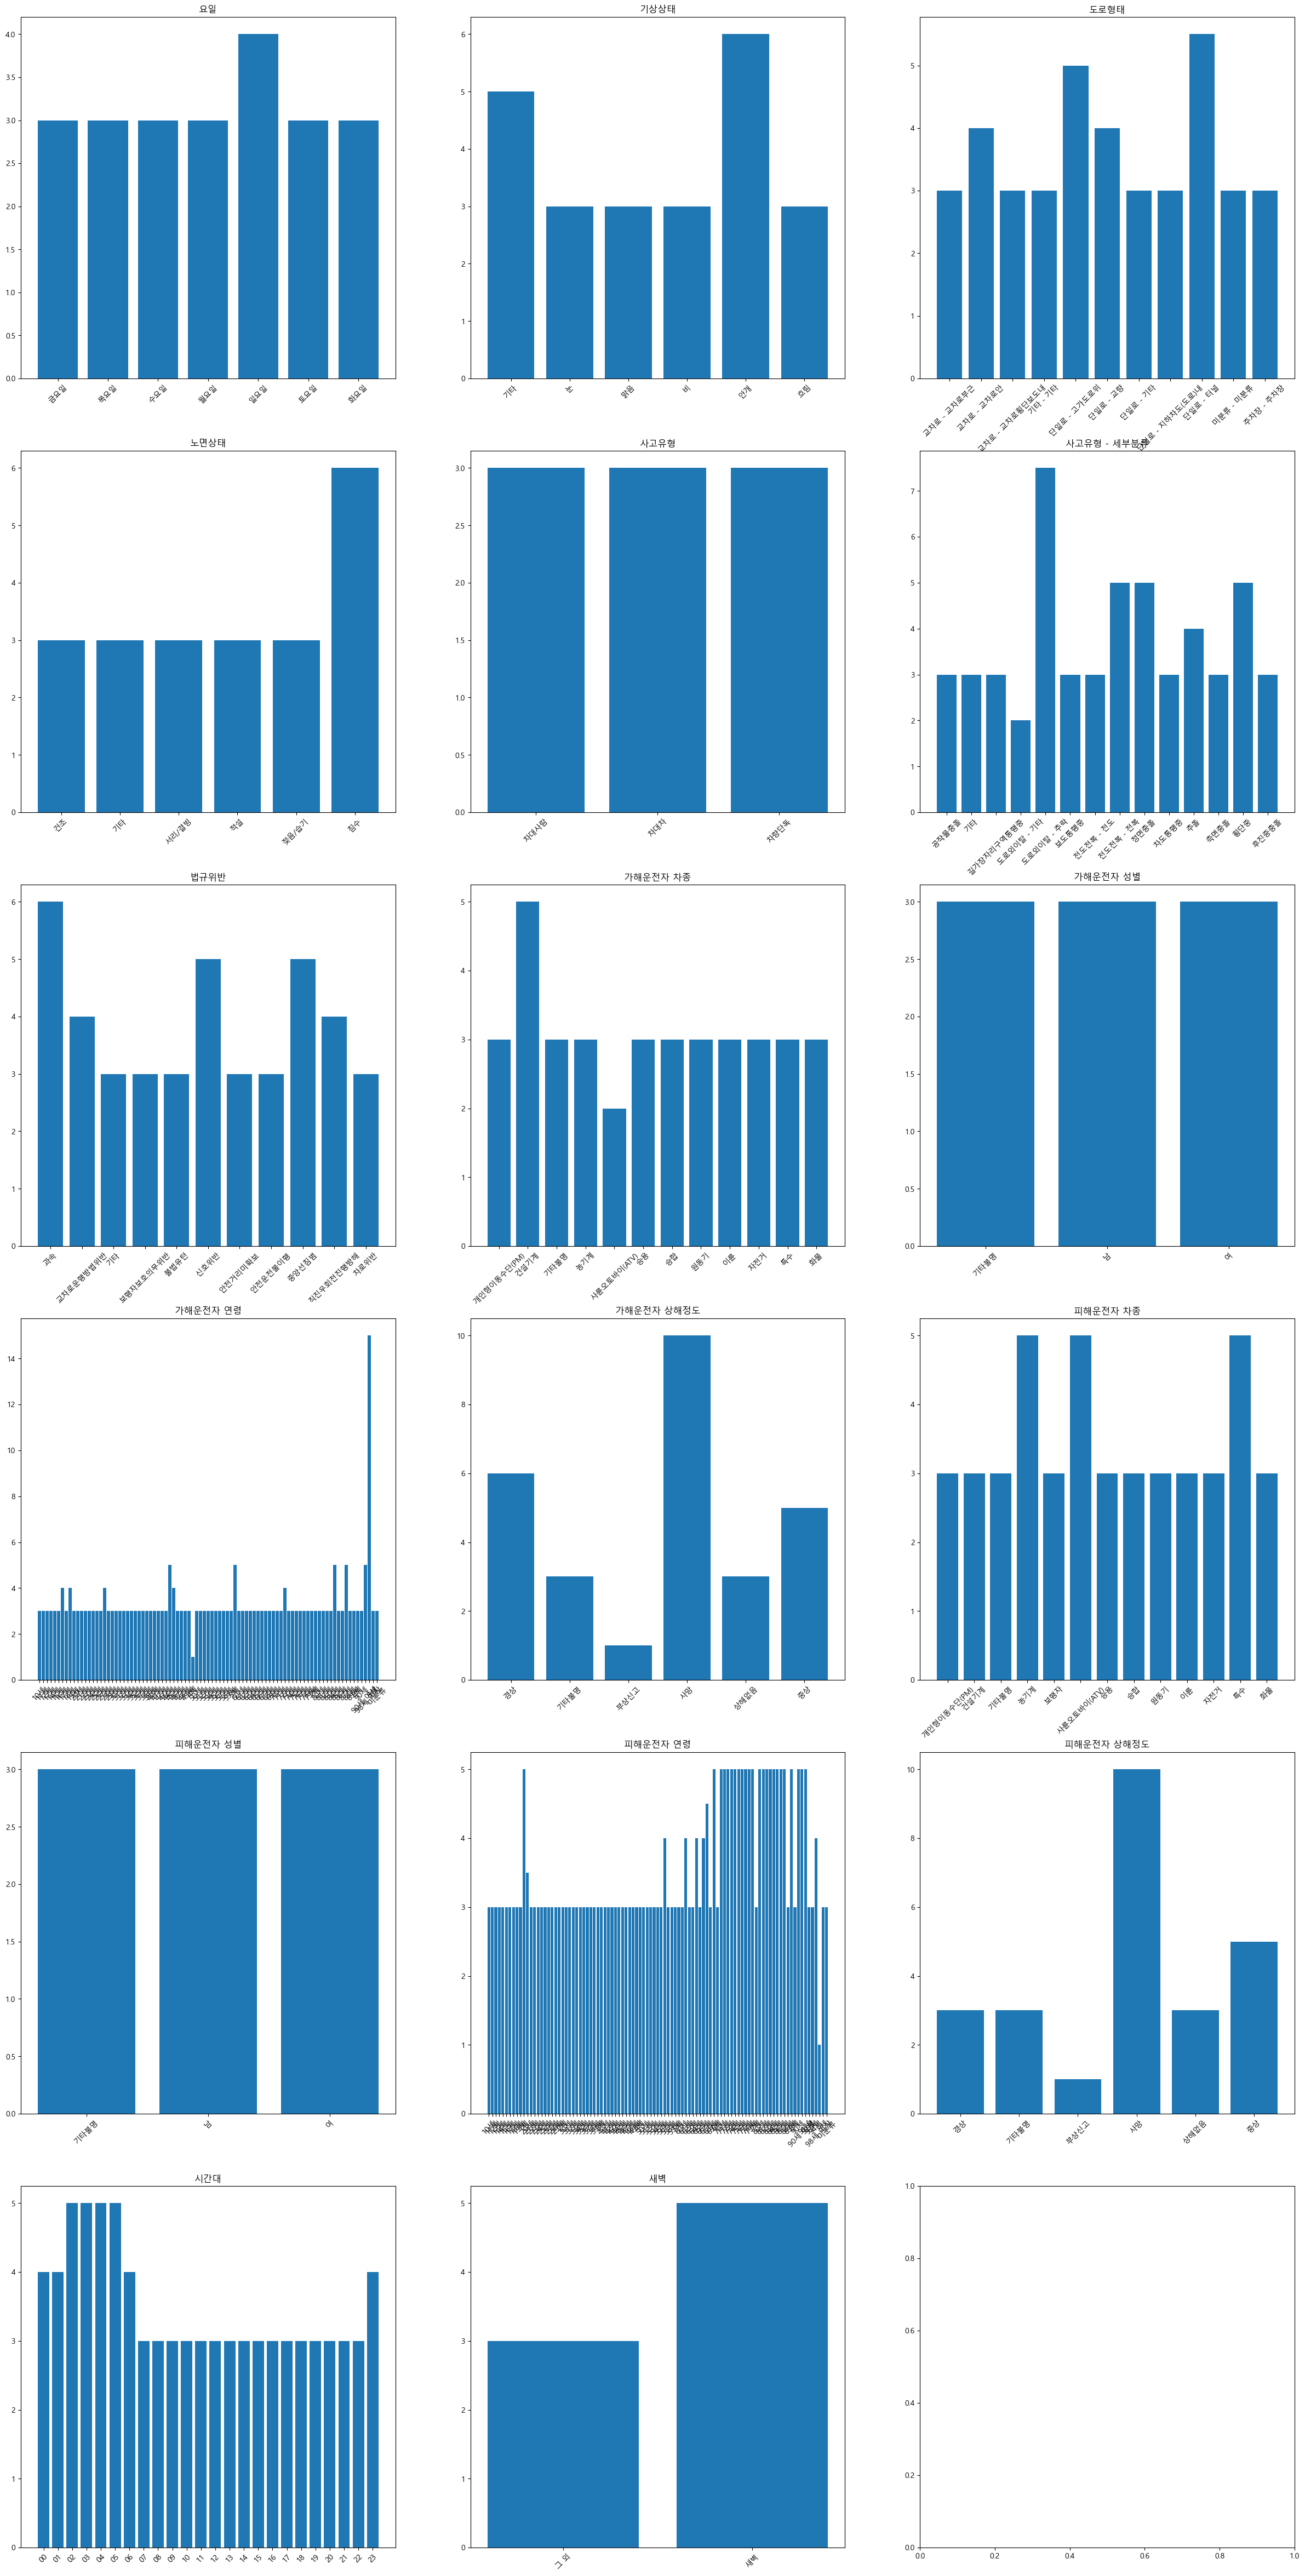

In [93]:
col = ['요일', '기상상태', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '시간대', '새벽']
fig, axes = plt.subplots(6,3, figsize = (30,60))
for i,ax in enumerate(axes.flat):
    if i >= len(col):
        break
    temp = train_df.groupby(col[i])['ECLO'].median().reset_index().sort_values(by = col[i])
    ax.bar(x= col[i], height = 'ECLO', data = temp)
    ax.set_title(col[i])
    ax.tick_params(axis='x', rotation=45)
    xlabels = temp.index
plt.show()

In [162]:
temp[col[i]]

0    금요일
1    목요일
2    수요일
3    월요일
4    일요일
5    토요일
6    화요일
Name: 요일, dtype: object

C:\Users\yunhy\AppData\Local\Temp\ipykernel_20236\336685402.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp1 = train_df.groupby(col[i]).size().reset_index().sort_values(by = col[i]).rename(columns = {0 : 'cnt'})
C:\Users\yunhy\AppData\Local\Temp\ipykernel_20236\336685402.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2 = train_df.groupby(col[i])['ECLO'].median().reset_index().sort_values(by = col[i])


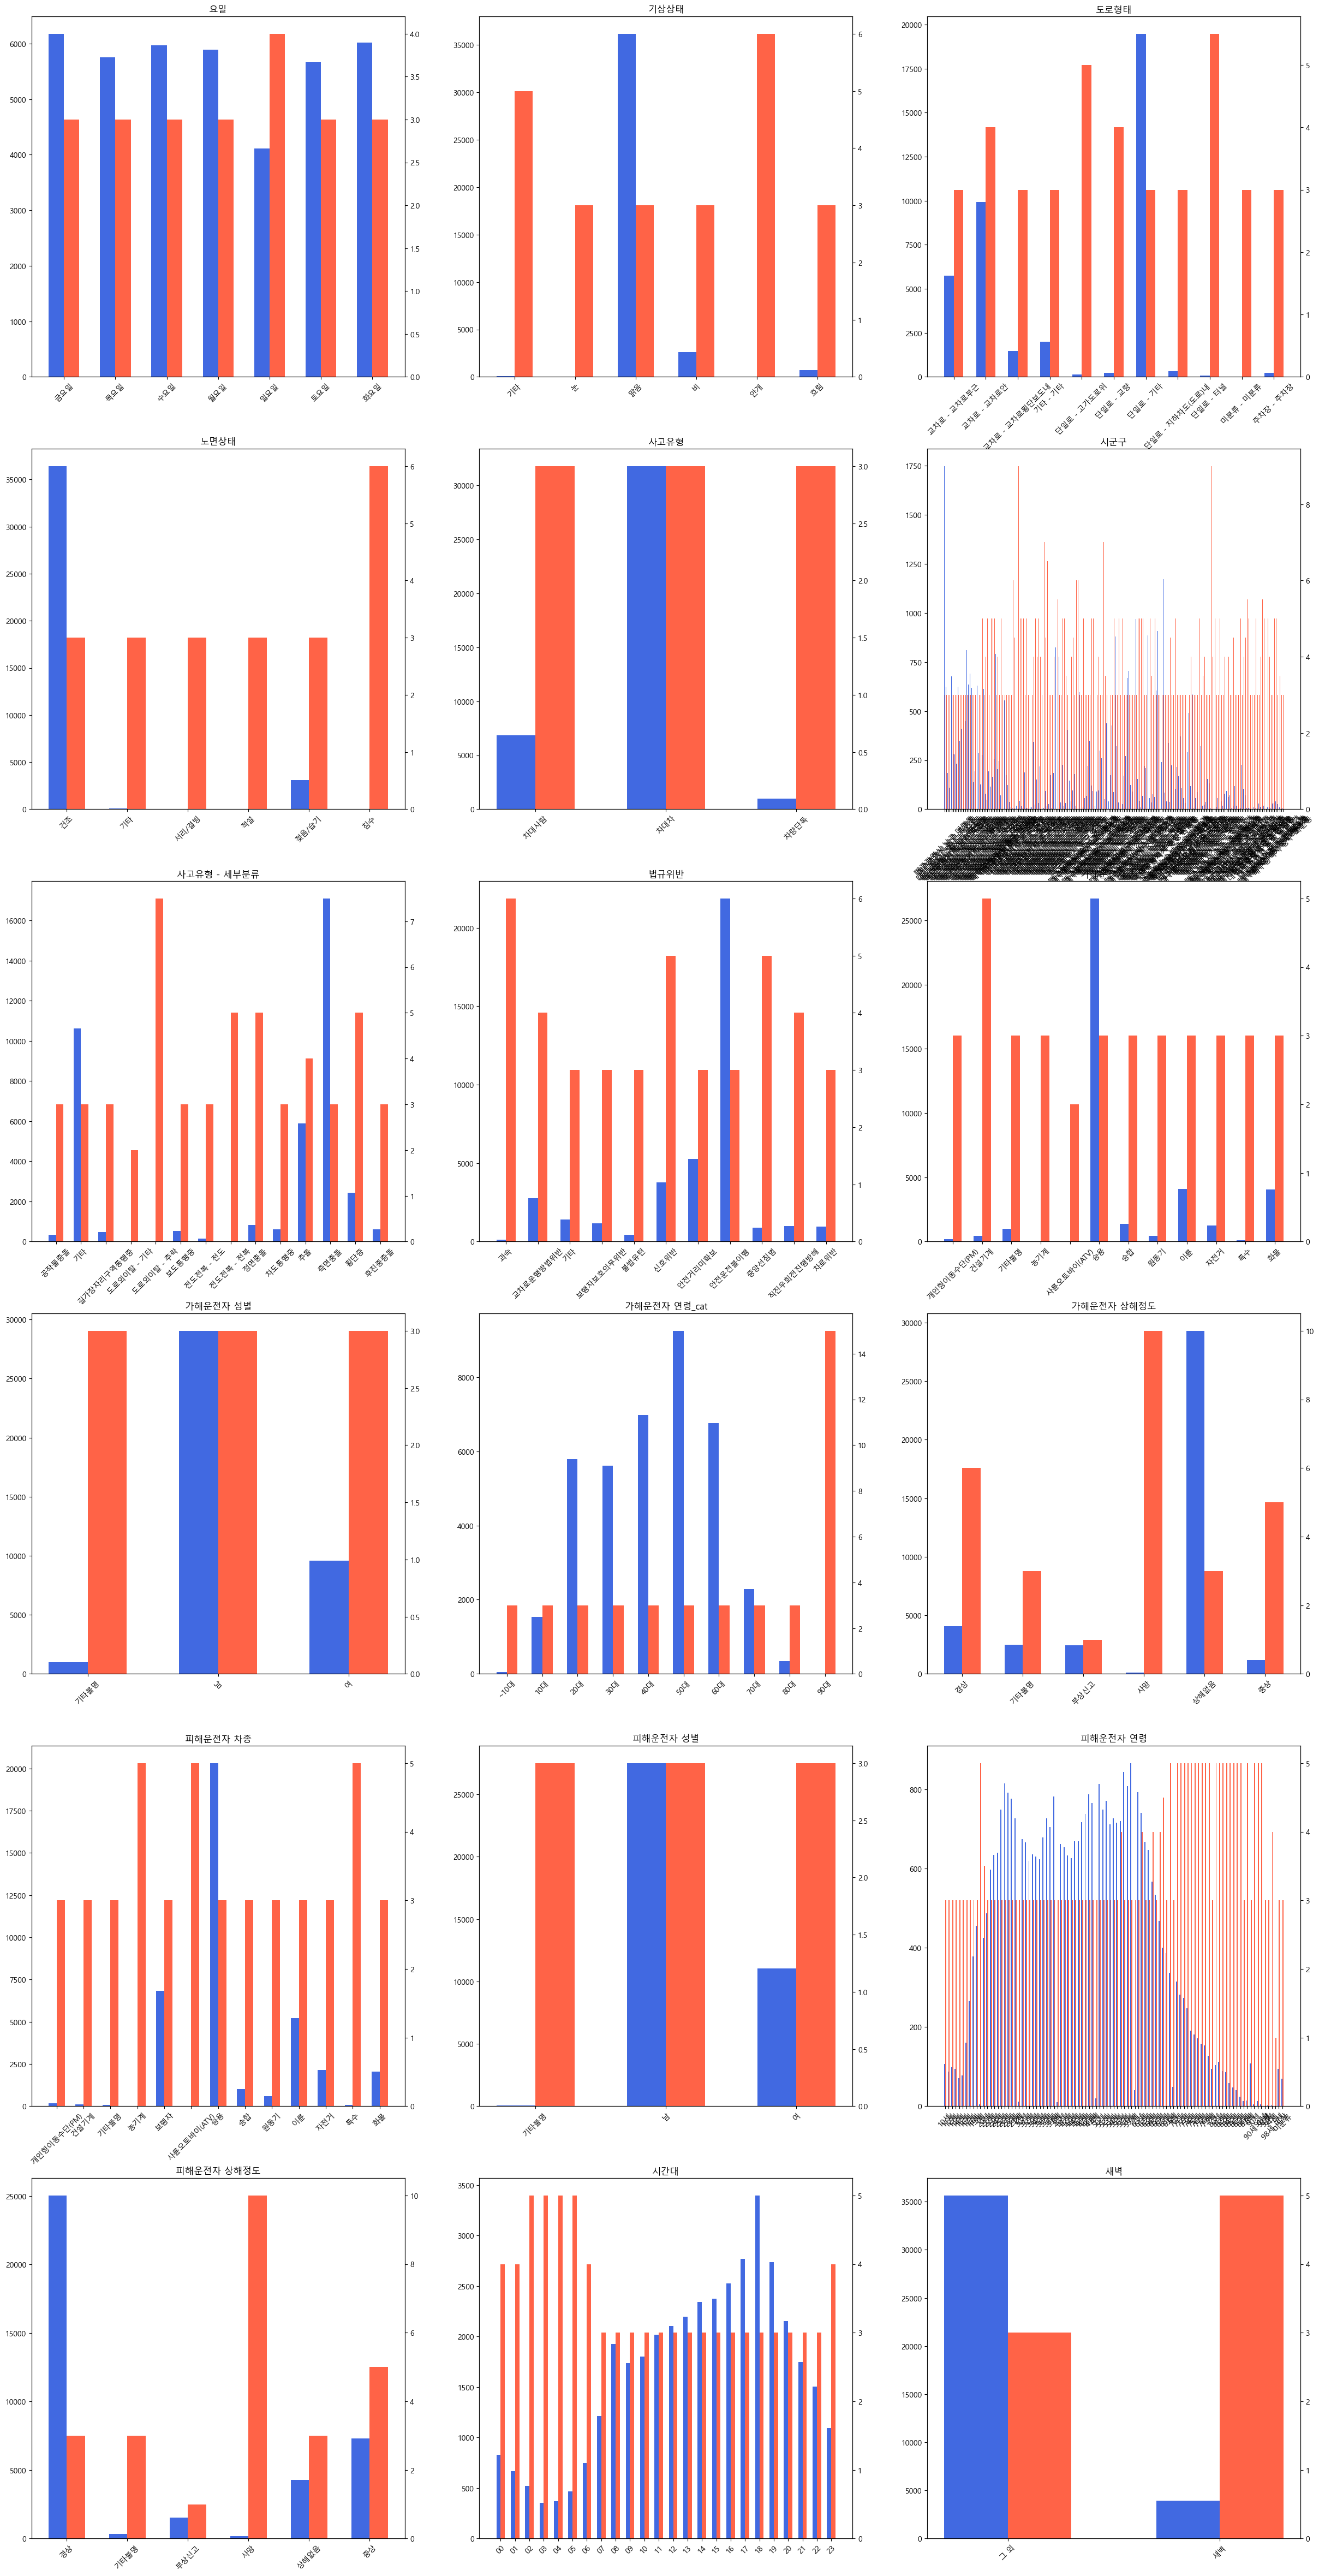

In [215]:

width=0.3



col = ['요일', '기상상태', '도로형태', '노면상태', '사고유형', '시군구',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령_cat', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '시간대', '새벽']
fig, axes = plt.subplots(6,3, figsize = (30,60))
for i,ax in enumerate(axes.flat):
       if i >= len(col):
              break
       temp1 = train_df.groupby(col[i]).size().reset_index().sort_values(by = col[i]).rename(columns = {0 : 'cnt'})
       temp2 = train_df.groupby(col[i])['ECLO'].median().reset_index().sort_values(by = col[i])
       temp = temp1.merge(temp2)
       idx = np.arange(len(temp.index))
       ax.bar(idx-width/2, temp['cnt'],
           color='royalblue',
           width=width)
       
       
       ax2 = ax.twinx()
       ax2.bar(idx+width/2, temp['ECLO'],
              color='tomato',
              width=width)
       
       ax.set_title(col[i])
       ax.tick_params(axis='x', rotation=45)
       ax.set_xticks(idx)
       ax.set_xticklabels(temp[col[i]])
plt.show()

C:\Users\yunhy\AppData\Local\Temp\ipykernel_20236\1788180942.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp1 = train_df.groupby(col[i]).size().reset_index().sort_values(by = col[i]).rename(columns = {0 : 'cnt'})
C:\Users\yunhy\AppData\Local\Temp\ipykernel_20236\1788180942.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2 = train_df.groupby(col[i])['ECLO'].median().reset_index().sort_values(by = col[i])


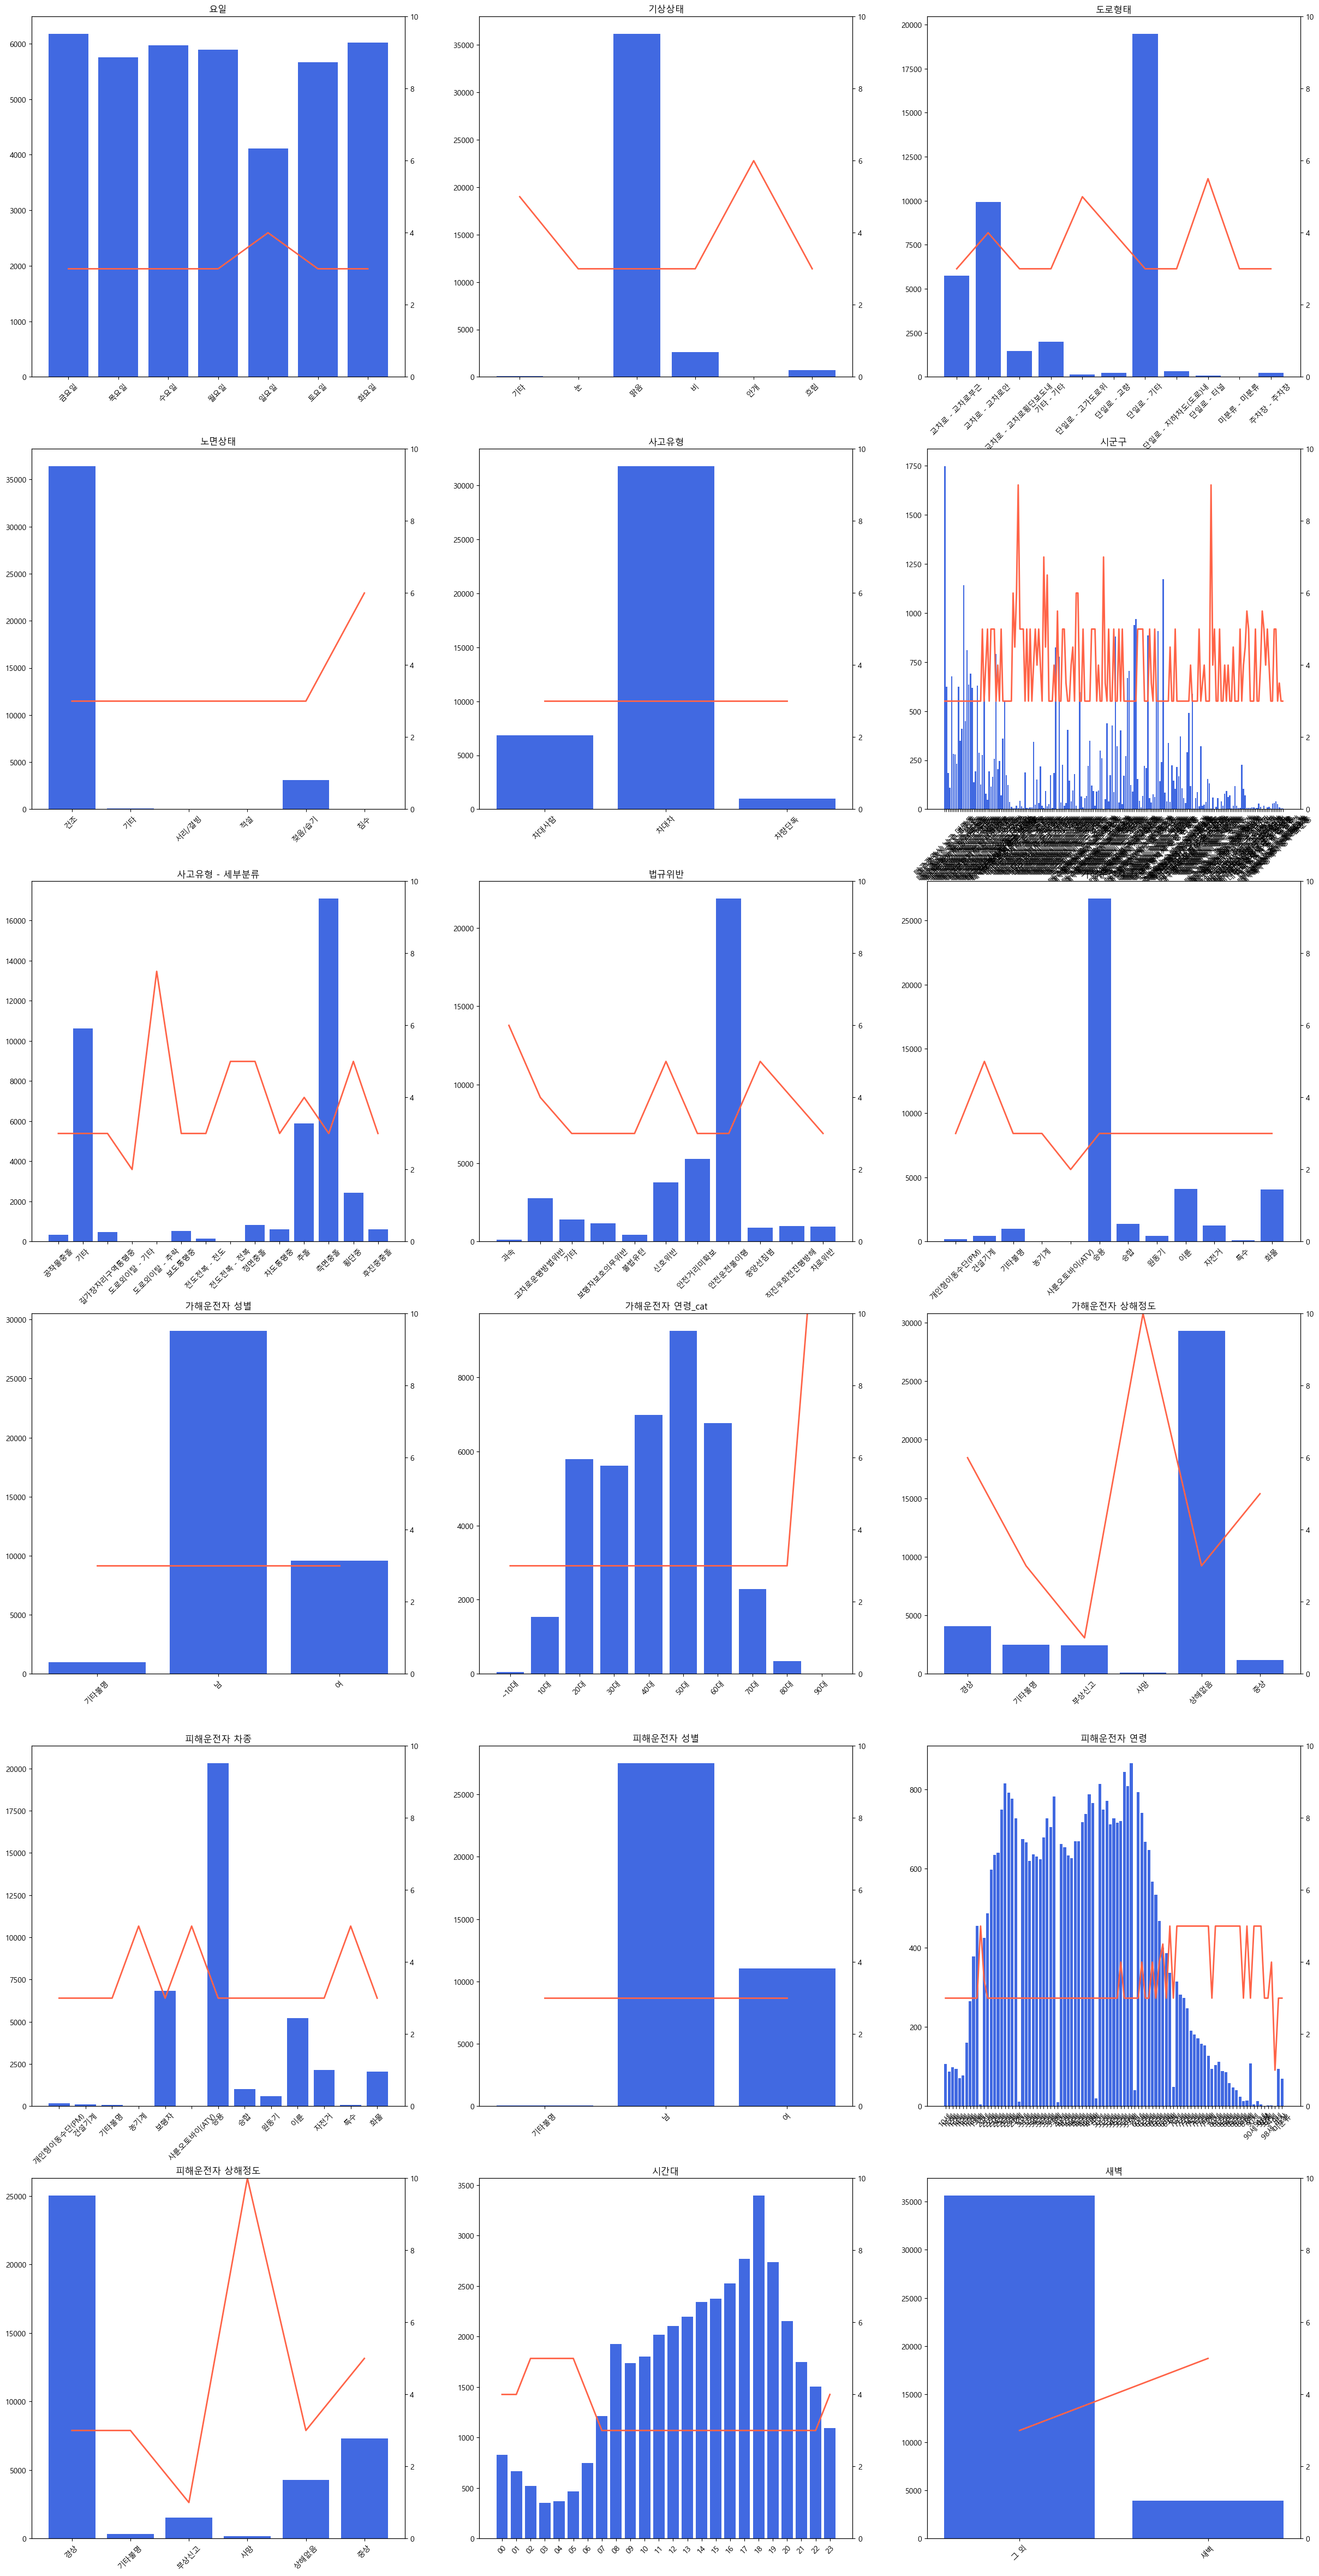

In [222]:
col = ['요일', '기상상태', '도로형태', '노면상태', '사고유형', '시군구',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령_cat', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '시간대', '새벽']
fig, axes = plt.subplots(6,3, figsize = (30,60))
for i,ax in enumerate(axes.flat):
       if i >= len(col):
              break
       temp1 = train_df.groupby(col[i]).size().reset_index().sort_values(by = col[i]).rename(columns = {0 : 'cnt'})
       temp2 = train_df.groupby(col[i])['ECLO'].median().reset_index().sort_values(by = col[i])
       temp = temp1.merge(temp2)
       idx = np.arange(len(temp.index))
       ax.bar(temp[col[i]], temp['cnt'],
           color='royalblue')
       
       
       ax2 = ax.twinx()
       ax2.plot(temp[col[i]], temp['ECLO'],
              color='tomato', linewidth = 2)
       ax2.set_ylim(0,10)
       ax.set_title(col[i])
       ax.tick_params(axis='x', rotation=45)

- 요일 : 일요일에 사고가 많이 나는 듯 (이동하는 사람들이 많아지는? 여행하는 타지인이 많은건가)
- 기상상태 : 안개 꼈을 때
- 도로형태 : 단일로 - 터널, 단일로 - 고가도로 위, 단일로-교량, 교차로 - 교차로 안
- 법규형태 : 과속, 신호위반, 중앙선 침범
- 시간대 : 새벽 시간대

<BarContainer object of 8 artists>

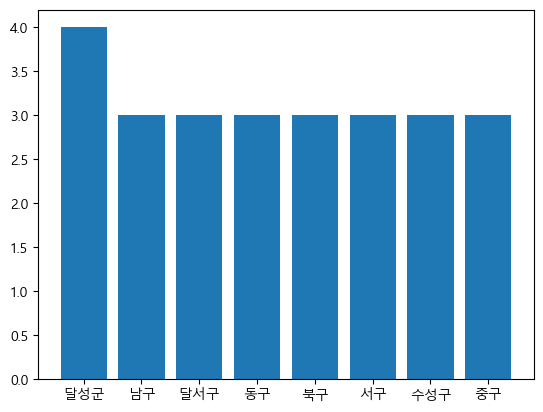

In [218]:
train_df['시군구_cat'] = train_df['시군구'].apply(lambda x: x.split(' ')[1]) 
temp = train_df.groupby('시군구_cat')['ECLO'].median().reset_index().sort_values('ECLO', ascending=False)
plt.bar(temp['시군구_cat'], temp['ECLO'])

In [214]:
temp

,시군구,ECLO
43,대구광역시 동구 덕곡동,9.0
156,대구광역시 중구 대안동,9.0
93,대구광역시 북구 도남동,7.0
58,대구광역시 동구 상매동,7.0
60,대구광역시 동구 송정동,6.5
...,...,...
84,대구광역시 북구 관음동,3.0
85,대구광역시 북구 구암동,3.0
89,대구광역시 북구 노원동1가,3.0
91,대구광역시 북구 노원동3가,3.0


## 1. 피해 운전자와 가해 운전자 연령 사이의 연관

In [113]:
train_df['피해운전자 연령'].unique()

array(['70세', '61세', '38세', '36세', '52세', '35세', '76세', '53세', '62세',
       '42세', '60세', '69세', '31세', '23세', nan, '57세', '17세', '54세', '55세',
       '64세', '41세', '44세', '58세', '45세', '30세', '59세', '34세', '68세',
       '32세', '21세', '56세', '18세', '37세', '39세', '27세', '65세', '43세',
       '12세', '75세', '4세', '71세', '40세', '48세', '14세', '19세', '66세',
       '63세', '50세', '20세', '67세', '26세', '22세', '47세', '16세', '28세',
       '46세', '51세', '29세', '33세', '24세', '79세', '80세', '74세', '78세',
       '72세', '49세', '73세', '5세', '13세', '77세', '9세', '86세', '15세', '84세',
       '25세', '82세', '10세', '8세', '85세', '7세', '11세', '88세', '미분류', '87세',
       '83세', '90세 이상', '3세', '81세', '6세', '89세', '2세', '1세', '91세',
       '90세', '93세', '94세', '92세', '98세 이상'], dtype=object)

In [130]:
train_df['피해운전자 연령_int'] = train_df['피해운전자 연령'].fillna('-1세').str.replace('미분류', '-1세').apply(lambda x : x.split('세')[0]).astype(int)
train_df['가해운전자 연령_int'] = train_df['가해운전자 연령'].fillna('-1세').str.replace('미분류', '-1세').apply(lambda x : x.split('세')[0]).astype(int)

train_df['가해운전자 연령_cat'] = pd.cut(train_df['가해운전자 연령_int'], bins = [0,10,20,30,40,50,60,70,80,90,100], labels = ['~10대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'])
train_df['피해운전자 연령_cat'] = pd.cut(train_df['피해운전자 연령_int'], bins = [0,10,20,30,40,50,60,70,80,90,100], labels = ['~10대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'])

In [188]:
# gb = train_df.groupby(['가해운전자 연령_cat','피해운전자 연령_cat']).size()
# temp = pd.DataFrame(gb / gb.groupby(level=0).sum()).reset_index()
# temp.rename(columns = {0 : 'cnt'}, inplace =True)
# temp = temp.pivot(index = '가해운전자 연령_cat', columns = '피해운전자 연령_cat')
# sns.heatmap(temp, annot = True)
# plt.title('가해-피해운전자 연령 비율')

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (12,7))
idx = np.arange(len(temp.index))
ax.bar(idx-width/2, temp['cnt'],
           color='royalblue',
           width=width)
       
       
ax2 = ax.twinx()
ax2.bar(idx+width/2, temp['ECLO'],
        color='tomato',
        width=width)

C:\Users\yunhy\AppData\Local\Temp\ipykernel_20236\2915398642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = train_df.groupby(['가해운전자 연령_cat','피해운전자 연령_cat']).size().reset_index().pivot(index = '가해운전자 연령_cat', columns = '피해운전자 연령_cat')


Text(0.5, 1.0, '가해-피해운전자 연령 빈도')

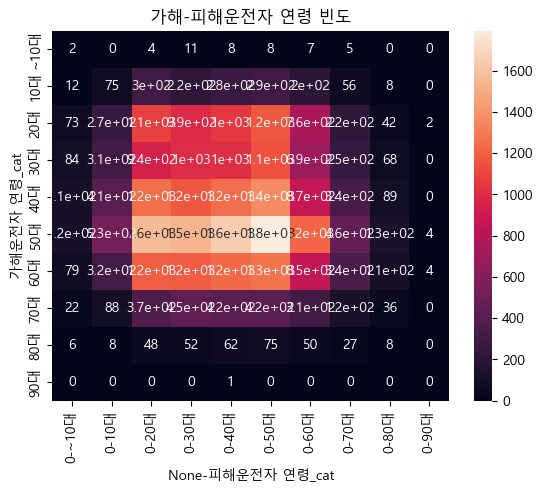

In [142]:
temp = train_df.groupby(['가해운전자 연령_cat','피해운전자 연령_cat']).size().reset_index().pivot(index = '가해운전자 연령_cat', columns = '피해운전자 연령_cat')
sns.heatmap(temp, annot = True)
plt.title('가해-피해운전자 연령 빈도')

C:\Users\yunhy\AppData\Local\Temp\ipykernel_20236\3478649976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = train_df.groupby(['가해운전자 연령_cat','피해운전자 연령_cat'])['ECLO'].median().reset_index().pivot(index = '가해운전자 연령_cat', columns = '피해운전자 연령_cat')


Text(0.5, 1.0, '가해-피해운전자 연령별 ECLO 중앙값')

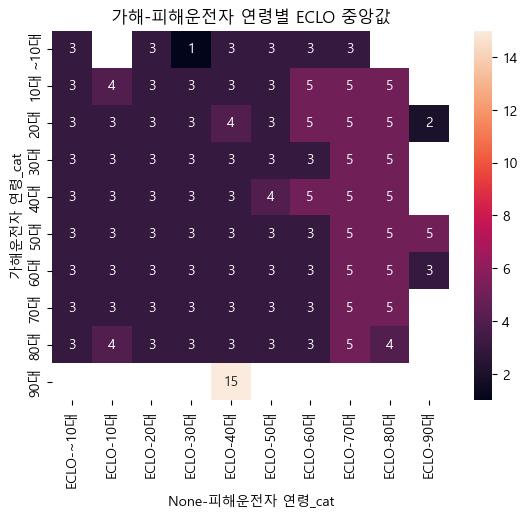

In [143]:
temp = train_df.groupby(['가해운전자 연령_cat','피해운전자 연령_cat'])['ECLO'].median().reset_index().pivot(index = '가해운전자 연령_cat', columns = '피해운전자 연령_cat')
sns.heatmap(temp, annot = True)
plt.title('가해-피해운전자 연령별 ECLO 중앙값')

- 15 나온거는 90대 사고 하나 뿐이라서..

In [133]:
train_df[train_df['가해운전자 연령_cat'] == '90대']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,중상자수,경상자수,부상자수,ECLO,시간대,새벽,피해운전자 연령_int,가해운전자 연령_int,가해운전자 연령_cat,피해운전자 연령_cat
22078,ACCIDENT_22078,2020-08-10 16,월요일,비,대구광역시 북구 사수동,단일로 - 기타,젖음/습기,차대차,추돌,안전거리미확보,...,0,5,0,15,16,그 외,49,98,90대,40대


## 2. 운전자 차종과의 연관

<Axes: xlabel='None-피해운전자 차종', ylabel='가해운전자 차종'>

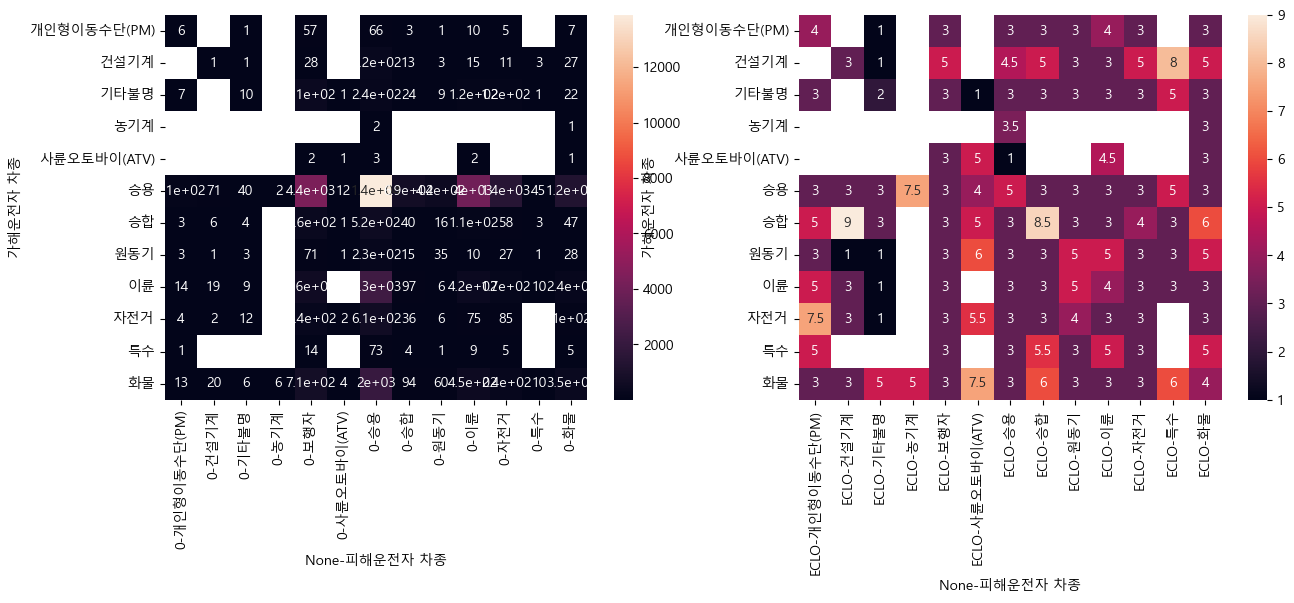

In [192]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
temp = train_df.groupby(['가해운전자 차종','피해운전자 차종']).size().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
sns.heatmap(temp, annot = True, ax = axes[0])

temp = train_df.groupby(['가해운전자 차종','피해운전자 차종'])['ECLO'].median().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
sns.heatmap(temp, annot = True, ax = axes[1])

C:\Users\yunhy\AppData\Local\Temp\ipykernel_20236\1386735623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = train_df.groupby(['피해운전자 연령_cat','피해운전자 상해정도']).size().reset_index().pivot(index = '피해운전자 연령_cat', columns = '피해운전자 상해정도')


<Axes: xlabel='None-피해운전자 상해정도', ylabel='피해운전자 연령_cat'>

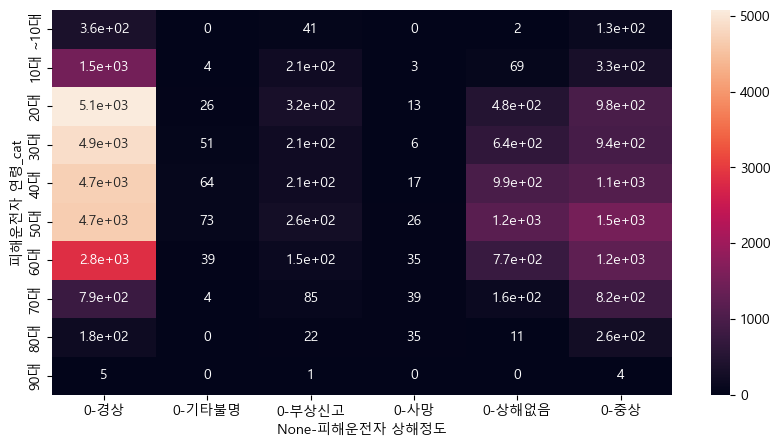

In [170]:
temp = train_df.groupby(['피해운전자 연령_cat','피해운전자 상해정도']).size().reset_index().pivot(index = '피해운전자 연령_cat', columns = '피해운전자 상해정도')
fig, ax = plt.subplots(figsize=(10,5))     
sns.heatmap(temp, annot = True, ax = ax)

In [201]:
# fig, axes = plt.subplots(2,2, figsize = (20,10))
# temp = train_df[train_df['새벽'] == '새벽']
# temp2 = temp.groupby(['가해운전자 차종','피해운전자 차종']).size().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp2, annot = True, ax = axes[0][0])

# temp3 = temp.groupby(['가해운전자 차종','피해운전자 차종'])['ECLO'].median().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp3, annot = True, ax = axes[0][1])

# temp = train_df[train_df['새벽'] == '그 외']
# temp2 = temp.groupby(['가해운전자 차종','피해운전자 차종']).size().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp2, annot = True, ax = axes[1][0])

# temp3 = temp.groupby(['가해운전자 차종','피해운전자 차종'])['ECLO'].median().reset_index().pivot(index = '가해운전자 차종', columns = '피해운전자 차종')
# sns.heatmap(temp3, annot = True, ax = axes[1][1])